In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

: 

In [2]:
dataset = pd.read_csv(r'./data/Algerian_forest_fires_cleaned_dataset.csv')
dataset

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1.0,6.0,2012.0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2.0,6.0,2012.0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3.0,6.0,2012.0,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4.0,6.0,2012.0,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5.0,6.0,2012.0,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26.0,9.0,2012.0,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,239,27.0,9.0,2012.0,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,240,28.0,9.0,2012.0,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,241,29.0,9.0,2012.0,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [3]:
df = dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    float64
 2   month        243 non-null    float64
 3   year         243 non-null    float64
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    int64  
 15  region       243 non-null    int64  
dtypes: float64(10), int64(6)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

Unnamed: 0     0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [5]:
df.shape

(243, 16)

In [6]:
df = df.drop(['day',	'month', 'year', 'Unnamed: 0'], axis=1).reset_index(drop=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [8]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [9]:
df.corr().style.background_gradient(cmap='Blues')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [10]:
X = df.drop('FWI', axis=1)
y = df['FWI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

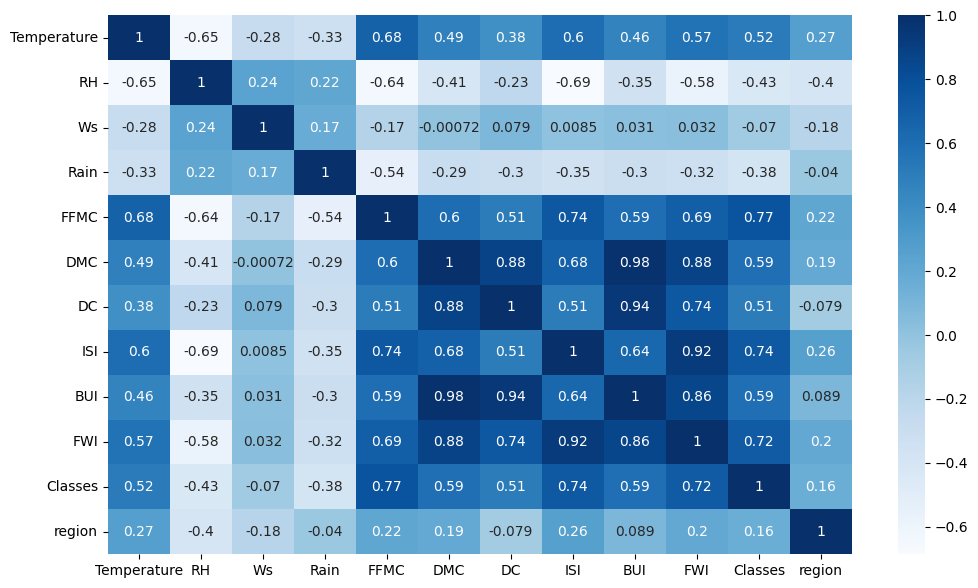

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [12]:
## removing the highly correlated features

def correlated(dataset, threshold):

    corr_matrix = dataset.corr()
    correlated_features = set()

    for i in range(len(corr_matrix.columns)):

        for j in range(i):

            if corr_matrix.iloc[i, j] > threshold:

                correlated_features.add(corr_matrix.columns[i])

    return correlated_features



In [13]:
corr_features = correlated(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [14]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

## Linear model

mse : 0.6829306792403752
r2_score : 0.9847206874554417


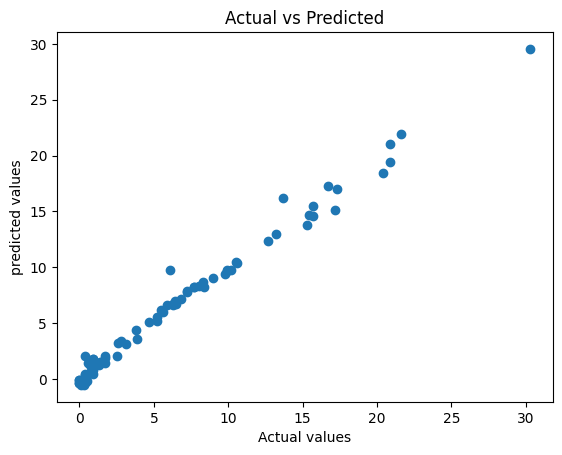

In [19]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print('mse :', mse)
print('r2_score :', score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("Actual vs Predicted")
plt.show()

## standard scalar

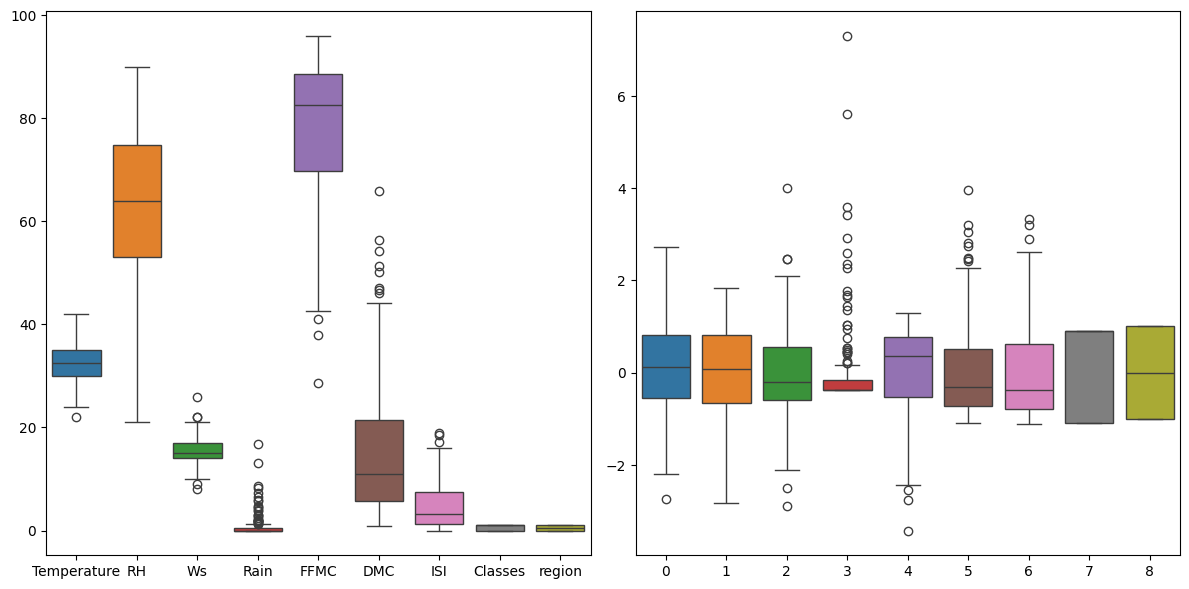

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)  # without scaled data
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled) # with scaled data
plt.tight_layout()
plt.show()

## Ridge Regression

ridge mse : 0.7079451074397779
ridge score : 0.9841610358272455


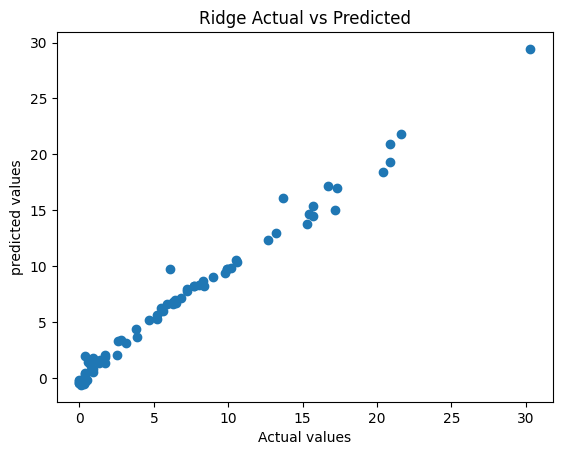

In [28]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)

ridge_y_pred = ridge_regression.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_score = r2_score(y_test, ridge_y_pred)

print("ridge mse :", ridge_mse)
print("ridge score :", ridge_score)

plt.scatter(y_test, ridge_y_pred)
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("Ridge Actual vs Predicted")
plt.show()

## Ridge cross validation

ridge mse : 0.707945107440034
ridge score : 0.9841610358272397


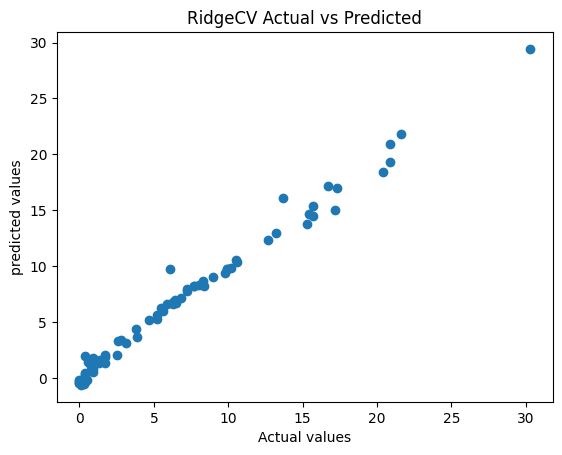

In [35]:
ridge_regressionCV = RidgeCV()
ridge_regressionCV.fit(X_train_scaled, y_train)

ridgeCV_y_pred = ridge_regressionCV.predict(X_test_scaled)

ridgeCV_mse = mean_squared_error(y_test, ridgeCV_y_pred)
ridgeCV_score = r2_score(y_test, ridgeCV_y_pred)

print("ridge mse :", ridgeCV_mse)
print("ridge score :", ridgeCV_score)

plt.scatter(y_test, ridgeCV_y_pred)
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("RidgeCV Actual vs Predicted")
plt.show()

## Lasso Regression

Lasso MSE : 2.1840267665734507
Lasso score : 0.9511364350928344


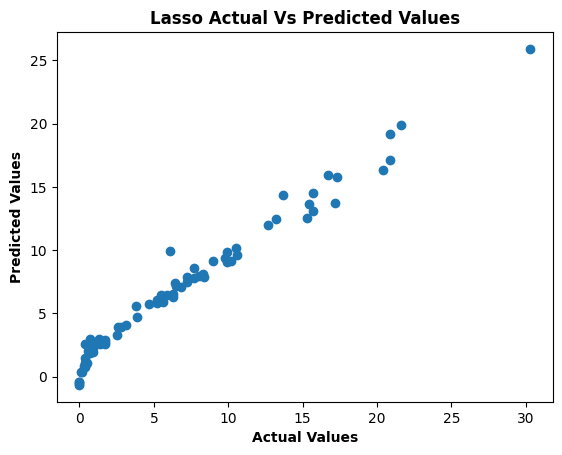

In [31]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)

lasso_y_pred = lasso_regression.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_score = r2_score(y_test, lasso_y_pred)

print("Lasso MSE :", lasso_mse)
print("Lasso score :", lasso_score)

plt.scatter(y_test, lasso_y_pred)
plt.xlabel("Actual Values", weight = 'bold')
plt.ylabel("Predicted Values", weight='bold')
plt.title("Lasso Actual Vs Predicted Values", weight='bold')
plt.show()

## Lasso cross validation

LassoV MSE : 0.7972605196410514
LassoCV score : 0.9821627684487946


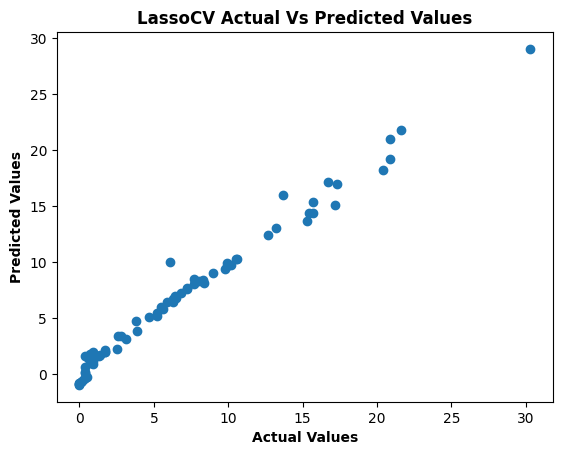

In [40]:
lassoCV_regression = LassoCV()
lassoCV_regression.fit(X_train_scaled, y_train)

lassoCV_y_pred = lassoCV_regression.predict(X_test_scaled)

lassoCV_mse = mean_squared_error(y_test, lassoCV_y_pred)
lassoCV_score = r2_score(y_test, lassoCV_y_pred)

print("LassoV MSE :", lassoCV_mse)
print("LassoCV score :", lassoCV_score)

plt.scatter(y_test, lassoCV_y_pred)
plt.xlabel("Actual Values", weight = 'bold')
plt.ylabel("Predicted Values", weight='bold')
plt.title("LassoCV Actual Vs Predicted Values", weight='bold')
plt.show()

## elastic Net

Elastic MSE : 5.345346375670643
Elastic score : 0.8804077479376988


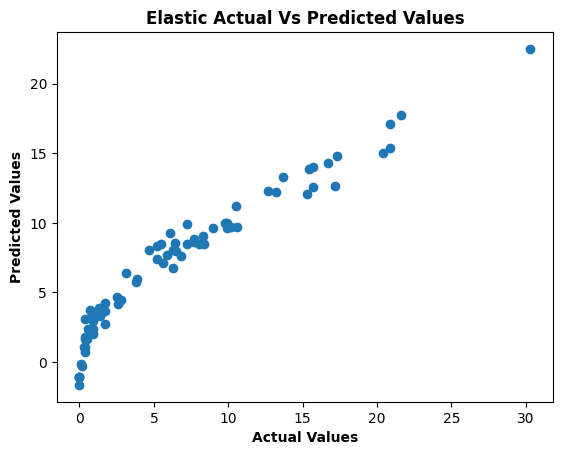

In [39]:
elastic_regression = ElasticNet()
elastic_regression.fit(X_train_scaled, y_train)

elastic_y_pred = elastic_regression.predict(X_test_scaled)

elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_score = r2_score(y_test, elastic_y_pred)

print("Elastic MSE :", elastic_mse)
print("Elastic score :", elastic_score)

plt.scatter(y_test, elastic_y_pred)
plt.xlabel("Actual Values", weight = 'bold')
plt.ylabel("Predicted Values", weight='bold')
plt.title("Elastic Actual Vs Predicted Values", weight='bold')
plt.show()

## Elastic cross validation

ElasticNetCV MSE : 0.8608422455718336
ElasticNetCV score : 0.9807402447693789


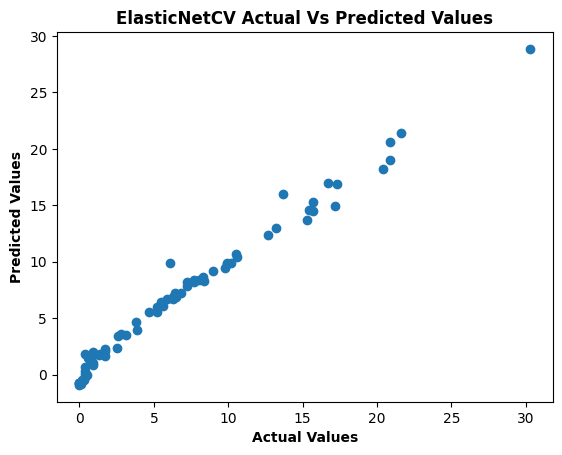

In [38]:
elasticCV_regression = ElasticNetCV()
elasticCV_regression.fit(X_train_scaled, y_train)

elasticCV_y_pred = elasticCV_regression.predict(X_test_scaled)

elasticCV_mse = mean_squared_error(y_test, elasticCV_y_pred)
elasticCV_score = r2_score(y_test, elasticCV_y_pred)

print("ElasticNetCV MSE :", elasticCV_mse)
print("ElasticNetCV score :", elasticCV_score)

plt.scatter(y_test, elasticCV_y_pred)
plt.xlabel("Actual Values", weight = 'bold')
plt.ylabel("Predicted Values", weight='bold')
plt.title("ElasticNetCV Actual Vs Predicted Values", weight='bold')
plt.show()

## Pickle model

In [42]:
pickle.dump(scaler, open('scaler.pkl', 'wb')) # scaler model
pickle.dump(ridge_regressionCV, open('ridgeCV.pkl', 'wb'))  # ridgeCV model got the highest r2_score